In [1]:
from numpy import *

# 三个辅助函数

In [2]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        linArr = list(map(float, curLine))
        dataMat.append(linArr)
    return dataMat

def distEclud(vecA, vecB):
    '''
    计算样本间欧氏距离
    '''
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet, k):
    '''
    输入矩阵和k
    输出值在最小值和最大值之间的矩阵，shape=(k,n)
    '''
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))
    for j in range(n):
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

In [3]:
datMat = mat(loadDataSet('testSet.txt'))

In [4]:
distEclud(datMat[0], datMat[1])

5.184632816681332

# 聚类算法

In [5]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[(clusterAssment[:, 0] == cent).T.tolist()[0], :]
            centroids[cent, :] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment

In [6]:
datMat = mat(loadDataSet('testSet.txt'))
myCentroids, clustAssing = kMeans(datMat, 4)

[[-3.58843632 -1.78739562]
 [-0.62688461 -1.11225235]
 [ 2.80417138 -3.37294237]
 [ 1.80187174 -0.36330602]]
[[-3.5286566  -1.63320224]
 [-1.91079047  2.50872273]
 [ 2.83232067 -2.96269794]
 [ 2.61852014  2.76690336]]
[[-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]]


# 二分K-均值聚类算法

In [7]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList = [centroid0]  #建立初始簇
    for j in range(m):
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataSet[j, :]) ** 2  #遍历所有样本，计算与质心距离
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[(clusterAssment[:, 0].A == i).T.tolist()[0], :]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:, 1])
            sseNotSplit = sum(clusterAssment[(clusterAssment[:, 0] != i).T.tolist()[0], 1])
            print("切分那一簇后的sse: {}, 没有切分那一簇的sse: {}".format(sseSplit, sseNotSplit))
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[(bestClustAss[:, 0] == 1).T.tolist()[0], 0] = len(centList) #更新簇的分配结果
        bestClustAss[(bestClustAss[:, 0] == 0).T.tolist()[0], 0] = bestCentToSplit
        print(f"The bestCentToSplit is: {bestCentToSplit}")
        print('The len of bestClustAss is: {}'.format(len(bestClustAss)))
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]  #更新存储质心的列表
        centList.append(bestNewCents[1, :].tolist()[0])
        clusterAssment[(clusterAssment[:, 0] == bestCentToSplit).T.tolist()[0], :] = bestClustAss
    return mat(centList), clusterAssment

In [8]:
datMat3 = mat(loadDataSet('testSet2.txt'))

In [9]:
centList, myNewAssments = biKmeans(datMat3, 3)

[[-3.38895769  4.43731645]
 [ 3.29124771  2.68918793]]
[[-2.79067761  2.63481109]
 [ 1.47897892  0.34916627]]
[[-2.94737575  3.3263781 ]
 [ 1.23710375  0.17480612]]
切分那一簇后的sse: 570.7227574246755, 没有切分那一簇的sse: 0.0
The bestCentToSplit is: 0
The len of bestClustAss is: 60
[[-3.00324656  3.25809091]
 [-4.21788655  2.80431839]]
[[-2.59844753  3.47589133]
 [-3.9941604   2.8778384 ]]
[[-2.43131608  3.45250362]
 [-3.90577229  3.092145  ]]
[[-2.1459026  3.421808 ]
 [-3.7488489  3.2309482]]
[[-1.9062885   3.42271988]
 [-3.64143392  3.26215025]]
[[-1.76576557  3.39794014]
 [-3.58362738  3.28784469]]
切分那一簇后的sse: 22.971771896318412, 没有切分那一簇的sse: 532.6598067890178
[[0.64696375 4.23168266]
 [2.98645657 1.58802109]]
[[ 1.7635965   3.68429667]
 [ 1.14419326 -0.44451574]]
[[ 2.95977168  3.26903847]
 [-0.32150057 -2.62473743]]
[[ 2.93386365  3.12782785]
 [-0.45965615 -2.7782156 ]]
切分那一簇后的sse: 68.68654812621844, 没有切分那一簇的sse: 38.06295063565756
The bestCentToSplit is: 1
The len of bestClustAss is: 40


In [10]:
centList

matrix([[-2.94737575,  3.3263781 ],
        [ 2.93386365,  3.12782785],
        [-0.45965615, -2.7782156 ]])

In [11]:
myNewAssments

matrix([[1.00000000e+00, 1.45461050e-01],
        [0.00000000e+00, 6.80213825e-01],
        [2.00000000e+00, 1.02184582e+00],
        [1.00000000e+00, 1.34548760e+00],
        [0.00000000e+00, 1.35376464e+00],
        [2.00000000e+00, 3.87167519e+00],
        [1.00000000e+00, 8.37259951e-01],
        [0.00000000e+00, 2.20116272e-01],
        [2.00000000e+00, 3.53809057e+00],
        [1.00000000e+00, 7.44081160e+00],
        [0.00000000e+00, 5.28070040e+00],
        [2.00000000e+00, 2.56674394e-02],
        [1.00000000e+00, 1.11946529e+00],
        [0.00000000e+00, 1.67890884e-01],
        [2.00000000e+00, 2.11734245e+00],
        [1.00000000e+00, 1.49635209e+00],
        [0.00000000e+00, 4.93628241e+00],
        [2.00000000e+00, 9.76749869e-03],
        [1.00000000e+00, 1.32453845e-01],
        [0.00000000e+00, 6.39346045e-01],
        [2.00000000e+00, 9.41791924e-01],
        [1.00000000e+00, 1.72445523e+00],
        [0.00000000e+00, 7.50682798e-01],
        [2.00000000e+00, 1.4878560

## 会收敛到全局最小值

In [12]:
import urllib
import json
from time import sleep

def geoGrab(stAddress, city):
    apiStem = 'http:// where.yahooapis.com/geocode?'
    params = {}
    params['flags'] = 'J'
    params['appid'] = 'ppp68N8t'
    params['location'] = f'{stAddress}, {city}'
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params
    print(yahooApi)
    c = urllib.request.urlopen(yahhoApi)
    return json.loads(c.read())

def massPlaceFind(fileName):
    fw = open('places.txt', 'w')
    for line in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print(f'{lineArr[0]}, {lat}, {lng}')
            fw.write(f'{line}, {lat}, {lng}')
        else:
            print('error fetching')
        sleep(1)
    fw.close()
    

# 爬虫问题不管

In [13]:
geoGrab('1 VA Center', 'Augusta, ME')

http:// where.yahooapis.com/geocode?flags=J&appid=ppp68N8t&location=1+VA+Center%2C+Augusta%2C+ME


AttributeError: module 'urllib' has no attribute 'request'

# 球面距离计算及簇绘图函数

In [14]:
def distSLC(vecA, vecB):
    a = sin(vecA[0, 1] * pi / 180) * sin(vecB[0, 1] * pi / 180)
    b = cos(vecA[0, 1] * pi / 180) * cos(vecB[0, 1] * pi / 180) * cos(pi * (vecB[0, 0] - vecA[0, 0]) / 180)
    return arccos(a + b) * 6371.0

import matplotlib
import matplotlib.pyplot as plt

def clusterClubs(numClust=5):
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
        
    fig = plt.figure()
    rect = [0.1, 0.1, 0.8, 0.8]  #创建矩形
    scatterMarkers = ['s', 'o', '^', '8', 'p', 'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
        
    ax0 = fig.add_axes(rect, label='ax0', **axprops)
    imgp = plt.imread('images\Portland.png')
    ax0.imshow(imgp)  #基于一副图像来创建矩阵
        
    ax1 = fig.add_axes(rect, label='ax1', frameon=False)  #在同一幅图上绘制一张新的图，使用两套坐标系统并且不做任何缩放和偏移
        
    for i in range(numClust):
        ptsInCurrCluster = datMat[(clustAssing[:, 0] == i).T.tolist()[0], :]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:, 0].flatten().A[0], ptsInCurrCluster[:, 1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:, 0].flatten().A[0], myCentroids[:, 1].flatten().A[0], marker="+", s=300)
    plt.show()
            

[[-122.62239206   45.52837816]
 [-122.77391529   45.45680022]]
[[-122.60678809   45.5231533 ]
 [-122.74989475   45.46078533]]
[[-122.60091776   45.52373143]
 [-122.7424066    45.47117767]]
[[-122.5986553    45.52336757]
 [-122.74105794   45.47566756]]
切分那一簇后的sse: 3431.6211509255145, 没有切分那一簇的sse: 0.0
The bestCentToSplit is: 0
The len of bestClustAss is: 69
[[-122.59269927   45.49746553]
 [-122.58568557   45.542012  ]]
[[-122.60432381   45.49946159]
 [-122.59276877   45.548193  ]]
[[-122.60136331   45.50081214]
 [-122.59538312   45.55062204]]
[[-122.59070463   45.50220241]
 [-122.61077062   45.55561924]]
[[-122.56281986   45.49956332]
 [-122.638791     45.55002832]]
[[-122.55151008   45.49826972]
 [-122.64074925   45.54577636]]
[[-122.53576076   45.49908271]
 [-122.63992984   45.5393045 ]]
[[-122.52181039   45.50142783]
 [-122.63817554   45.53465086]]
切分那一簇后的sse: 1230.2420927853307, 没有切分那一簇的sse: 1062.0271973570536
[[-122.69601133   45.42059136]
 [-122.82332565   45.51981696]]
[[-122.6994

C:\Users\Shanks\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\Shanks\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


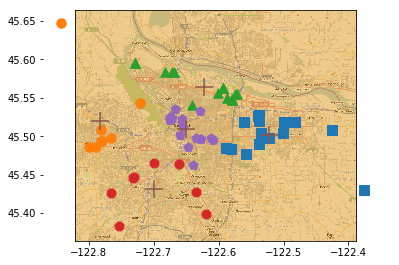

In [15]:
clusterClubs(5)

# 风暴潮案例

In [ ]:
from numpy import *

def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split()
        linArr = list(map(float, curLine))
        dataMat.append(linArr)
    return dataMat

def distEclud(vecA, vecB):
    '''
    计算样本间欧氏距离
    '''
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet, k):
    '''
    输入矩阵和k
    输出值在最小值和最大值之间的矩阵，shape=(k,n)
    '''
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))
    for j in range(n):
        minJ = min(dataSet[:, j])
        rangeJ = float(max(dataSet[:, j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids

def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[(clusterAssment[:, 0] == cent).T.tolist()[0], :]
            centroids[cent, :] = mean(ptsInClust, axis=0)
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m, 2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList = [centroid0]  #建立初始簇
    for j in range(m):
        clusterAssment[j, 1] = distMeas(mat(centroid0), dataSet[j, :]) ** 2  #遍历所有样本，计算与质心距离
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[(clusterAssment[:, 0].A == i).T.tolist()[0], :]
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:, 1])
            sseNotSplit = sum(clusterAssment[(clusterAssment[:, 0] != i).T.tolist()[0], 1])
            print("切分那一簇后的sse: {}, 没有切分那一簇的sse: {}".format(sseSplit, sseNotSplit))
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[(bestClustAss[:, 0] == 1).T.tolist()[0], 0] = len(centList) #更新簇的分配结果
        bestClustAss[(bestClustAss[:, 0] == 0).T.tolist()[0], 0] = bestCentToSplit
        print(f"The bestCentToSplit is: {bestCentToSplit}")
        print('The len of bestClustAss is: {}'.format(len(bestClustAss)))
        centList[bestCentToSplit] = bestNewCents[0, :].tolist()[0]  #更新存储质心的列表
        centList.append(bestNewCents[1, :].tolist()[0])
        clusterAssment[(clusterAssment[:, 0] == bestCentToSplit).T.tolist()[0], :] = bestClustAss
    return mat(centList), clusterAssment

In [ ]:
datMat3 = mat(loadDataSet('fengbaochao.txt'))
centList, myNewAssments = biKmeans(datMat3, 4)

In [ ]:
centList

In [ ]:
myNewAssments